In [1]:
import numpy as np
import matplotlib.pyplot as plt
from py_wake.wind_turbines import WindTurbines
def ct(ws):
    # CT curve for both types
    u = [0, 3, 4, 12, 25]
    ct = [1/9, 1/9, 8/9, 8/9,1/9]
    return np.interp(ws, u, ct)

def MyWT1_Power(ws):
    # Power curve for MyWT1
    u = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 25]
    p = [0, 66, 154, 282, 460, 696, 996, 1341, 1661, 1866, 1958, 1988, 1997, 1999, 2000, 2000]
    return np.interp(ws, u, p)

def MyWT2_Power(ws):
    # Power curve (function) for MyWT2
    return np.minimum(2000, np.maximum(0, ws**3))

wts = WindTurbines(names=['MyWT1','MyWT2'],
                   diameters=[80,100],
                   hub_heights=[70,80],
                   ct_funcs=[ct, # MyWT1
                             ct], # MyWT2
                   power_funcs=[MyWT1_Power, MyWT2_Power],
                   power_unit='kW'
                  )

In [2]:
print('Diameter', wts.diameter([0,1]))
print('Hub height', wts.hub_height([0,1]))

Diameter [ 80 100]
Hub height [70 80]


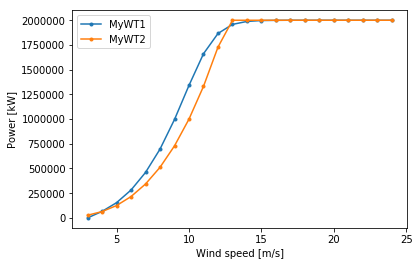

In [3]:
ws = np.arange(3,25)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Power [kW]')
for t in [0,1]:
    plt.plot(ws, wts.power(ws,t),'.-', label=wts.name(t))
plt.legend()

Finally, the `WindTurbines` class has a method to plot wind turbines in a wind farm given the positions


(-100, 300)

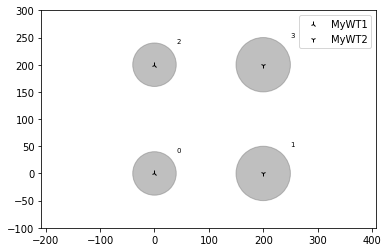

In [4]:
wt_x = [0,200,0,200]
wt_y = [0,0,200,200]
wt_types = [0,1,0,1] 
wts.plot(wt_x, wt_y, wt_types)
plt.ylim([-100,300])


Where the gray circles reflect the rotor size